In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
df2 = pd.read_csv('eda_df.csv')
df2

,name,age,overall,potential,position,pace,shooting,passing,dribbling,defending,physical,total_stats,value
0,Coutinho,29,82,82,4,69,79,80,88,52,59,2086,30.000
1,S. Botman,21,79,85,2,60,36,59,61,80,84,1736,25.500
2,D. Vlahović,21,80,86,4,75,82,60,74,28,77,1827,34.000
3,K. Trippier,30,84,84,2,73,63,82,77,80,72,2183,36.500
4,J. Cajuste,21,72,79,3,77,58,68,75,68,77,1930,4.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,V. Ozornwafor,22,64,73,2,60,36,41,39,64,68,1404,1.200
5217,B. Kramer,25,67,72,4,73,65,54,64,36,74,1691,1.500
5218,B. Baggley,19,54,68,4,65,49,51,57,44,41,1456,0.250
5219,F. Tavares,20,61,73,4,86,60,46,60,26,56,1488,0.800


<AxesSubplot:>

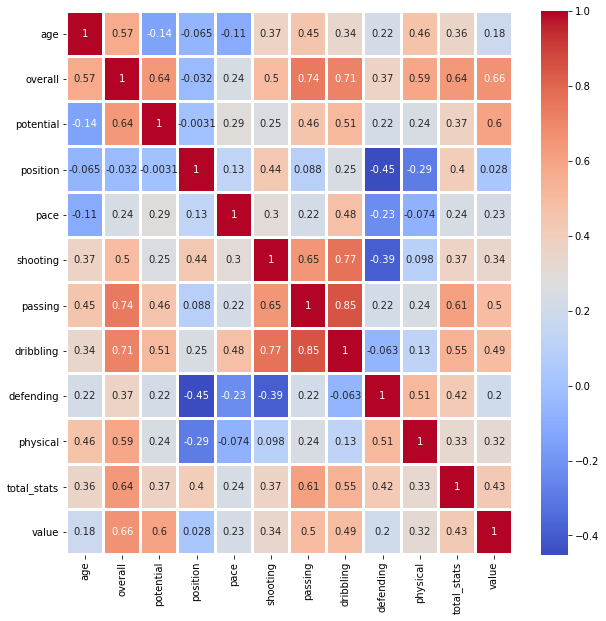

In [3]:
#First we'll look on heat-map and the dependence between the stats
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(),cmap='coolwarm', annot=True, linewidth=2, ax=ax)

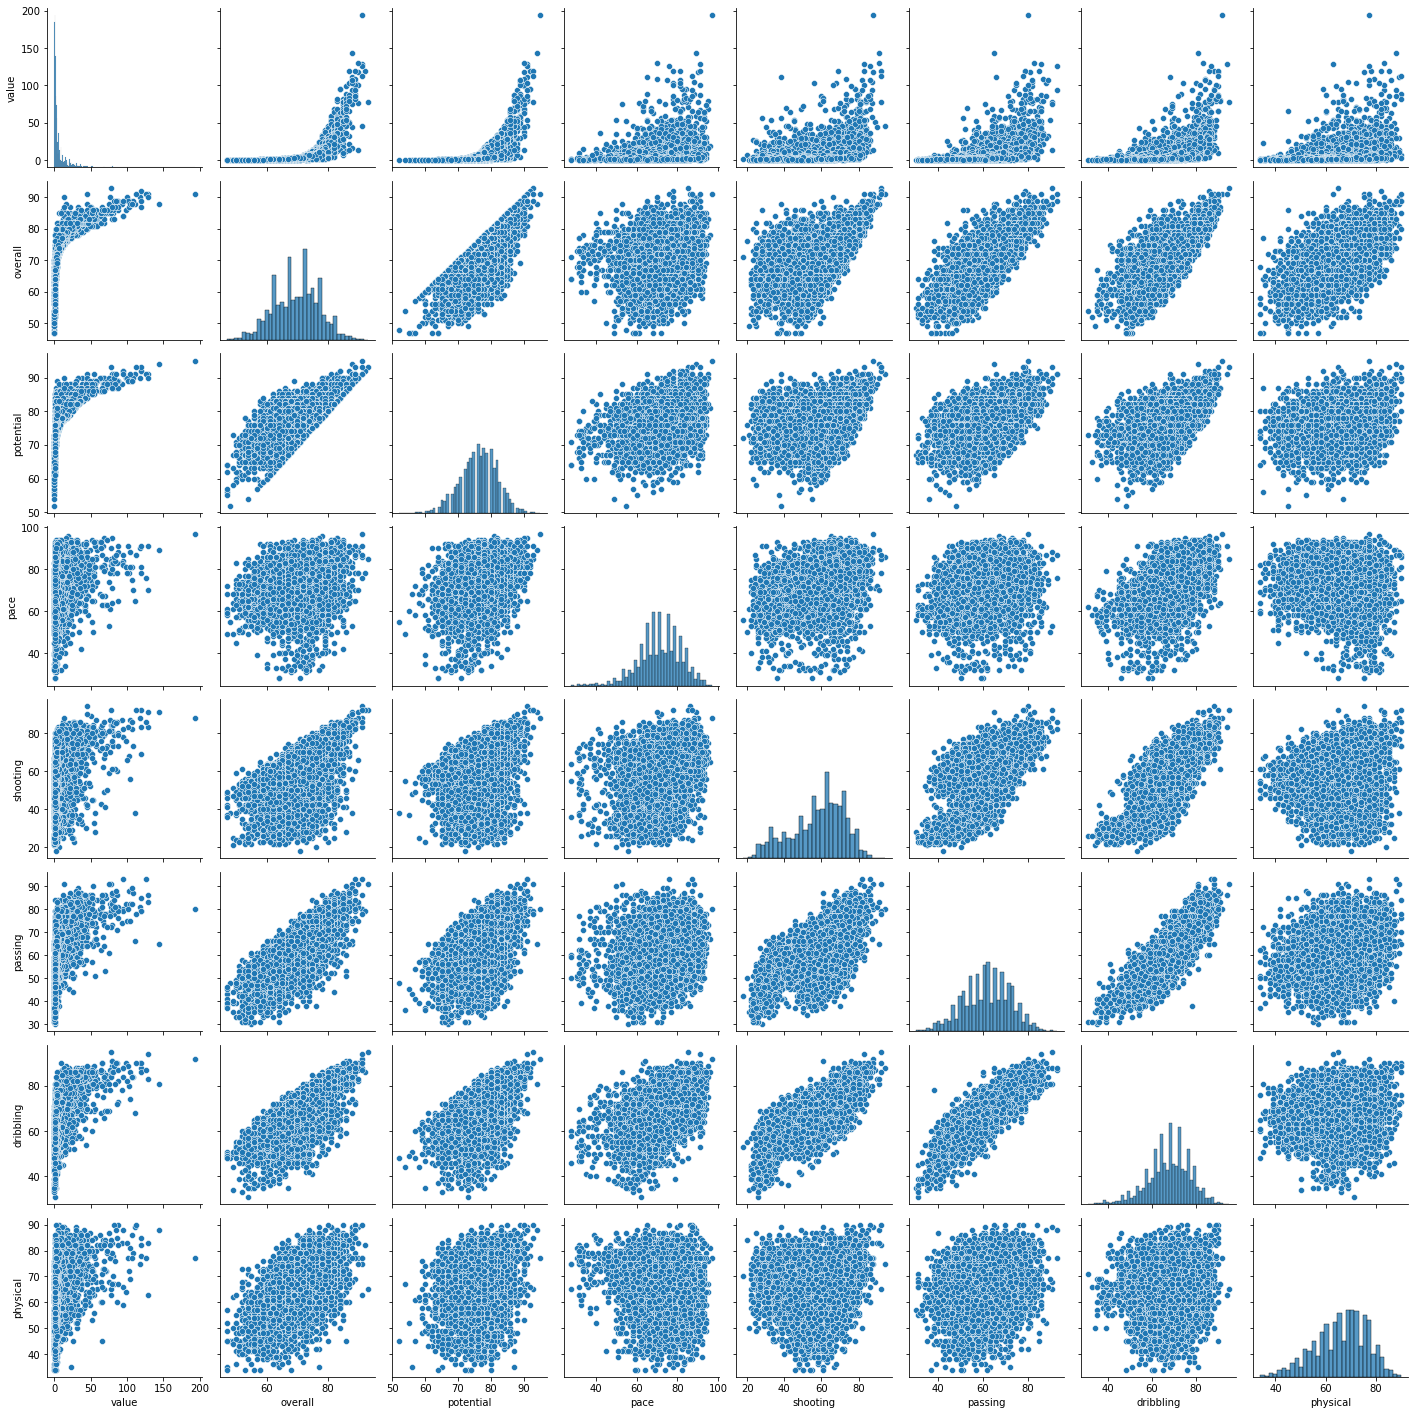

In [4]:
#pairplot with the stats that most affect the value
sns.pairplot(df2[['value','overall', 'potential', 'pace','shooting','passing','dribbling','physical']])

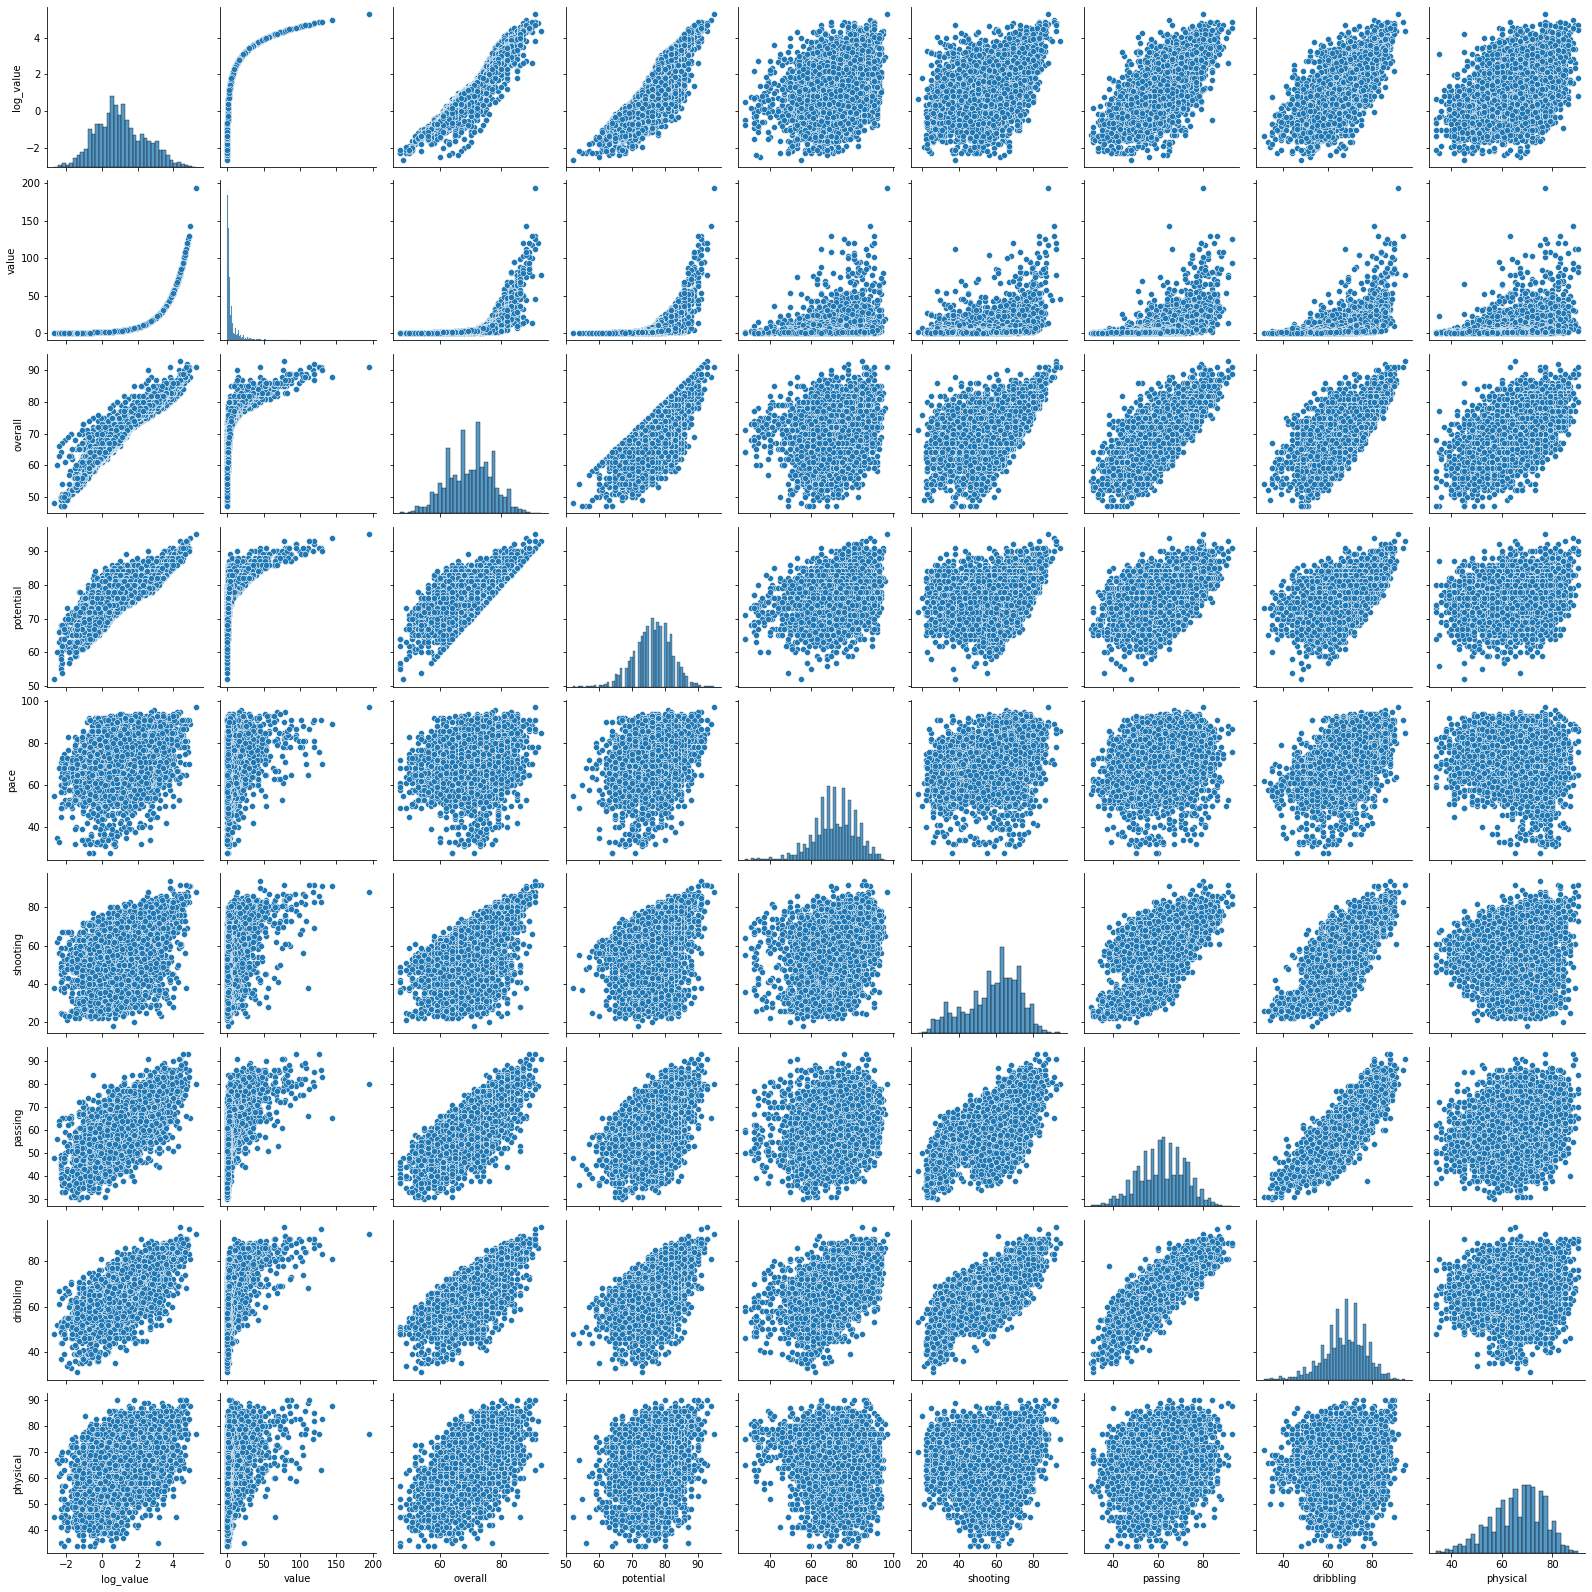

In [5]:
#If we'll look on the value row- its easy to see that it has logarithm relation with the other stats
df2['log_value'] = np.log(df2['value'])
sns.pairplot(df2[['log_value', 'value','overall', 'potential','pace','shooting','passing','dribbling','physical']])

<AxesSubplot:>

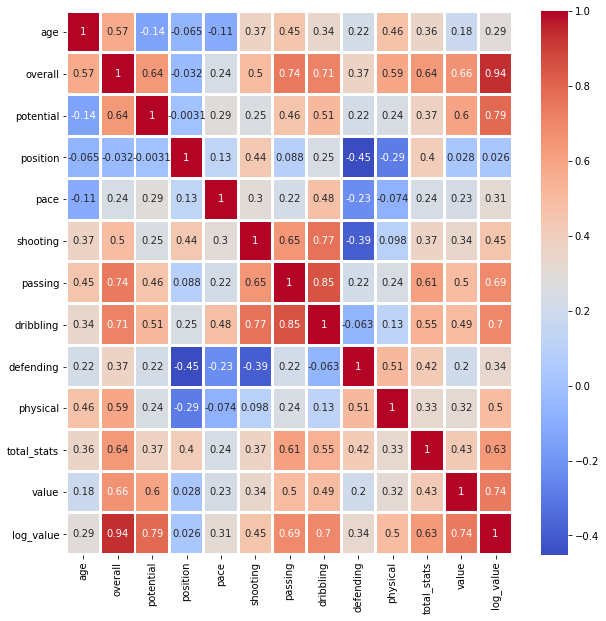

In [6]:
#If we'll look on the log value row - we can clearly see that there's a clear linear realtion with the other stats
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(),cmap='coolwarm', annot=True, linewidth=2, ax=ax)

In [7]:
df_test = pd.read_csv('ml_df.csv')
df_test

,name,overall,position,value,value_predicted,difference
0,Cristiano Ronaldo,91,4,45.0,76.379407,-31.379407
1,L. Bonucci,85,2,17.5,23.088993,-5.588993
2,Adán,81,1,4.4,8.525089,-4.125089
3,H. Elliott,73,4,7.0,11.065832,-4.065832
4,F. Muslera,80,1,2.3,6.343536,-4.043536
...,...,...,...,...,...,...
1040,R. Varane,86,2,68.5,51.956407,16.543593
1041,Marcos Llorente,86,4,88.0,70.481236,17.518764
1042,R. Mahrez,86,4,65.5,45.233881,20.266119
1043,Thiago,86,3,65.0,44.237554,20.762446


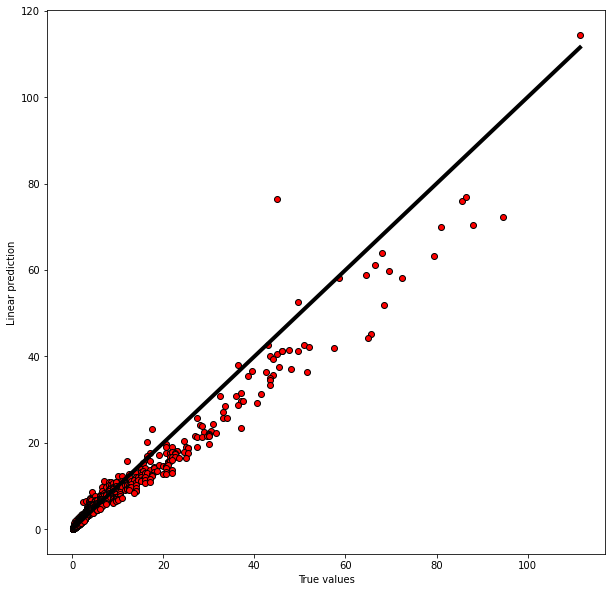

In [8]:
#here's a scatterplot that shows the real values vs the predicted ones
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_test['value'], df_test['value_predicted'], color='red', edgecolors='black')
ax.plot([df_test['value'].min(), df_test['value'].max()], [df_test['value'].min(), df_test['value'].max()], "k", lw=4)
ax.set_xlabel("True values")
ax.set_ylabel("Linear prediction")
plt.show()

,name,value,value_predicted
0,Cristiano Ronaldo,45.0,76.379407
1,L. Bonucci,17.5,23.088993
2,Adán,4.4,8.525089
3,H. Elliott,7.0,11.065832
4,F. Muslera,2.3,6.343536
5,A. Velasco,12.0,15.872484
6,Prazeracinho,16.5,20.085316
7,M. Olise,6.5,9.878284
8,D. Samek,3.1,6.451552
9,Gavi,4.0,7.303879


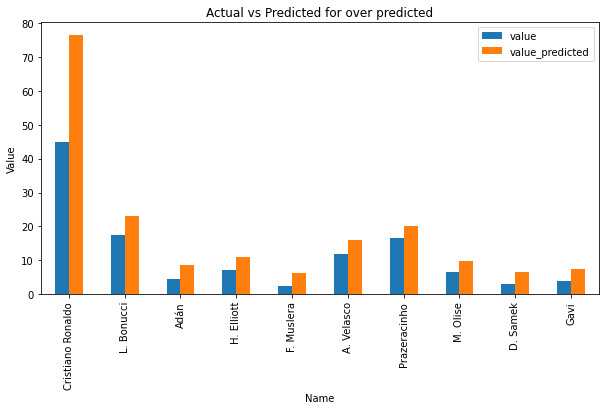

In [25]:
#Most accurate price predictions
show_df = df_test[['name','value','value_predicted']]
show_df.head(10).plot(kind='bar', x='name', figsize=(10,5))
plt.title('Actual vs Predicted for over predicted')
plt.xlabel('Name')
plt.ylabel('Value')
show_df.head(10)

,name,value,value_predicted
1035,R. Araujo,37.0,23.412301
1036,A. Laporte,72.5,58.170049
1037,İ. Gündoğan,51.5,36.360166
1038,C. Immobile,57.5,41.859834
1039,M. Depay,79.5,63.311984
1040,R. Varane,68.5,51.956407
1041,Marcos Llorente,88.0,70.481236
1042,R. Mahrez,65.5,45.233881
1043,Thiago,65.0,44.237554
1044,K. Havertz,94.5,72.257121


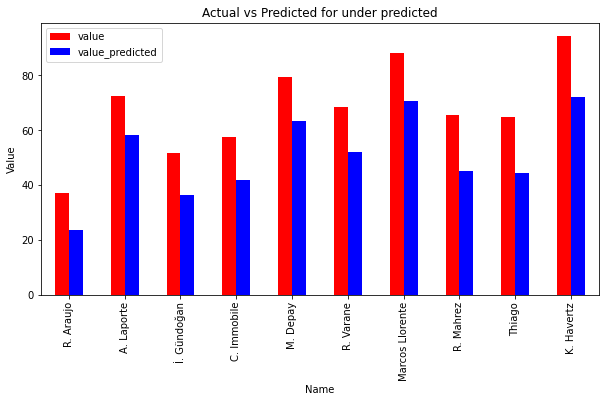

In [27]:
#Lowest accurate price predictions
show_df.tail(10).plot(kind='bar', x='name', figsize=(10,5), color=['red','blue'])
plt.title('Actual vs Predicted for under predicted')
plt.xlabel('Name')
plt.ylabel('Value')
show_df.tail(10)

In [21]:
df_test['error'] =abs(df_test['difference']) 
diff = df_test[['position','error']]
diff

,position,error
0,4,31.379407
1,2,5.588993
2,1,4.125089
3,4,4.065832
4,1,4.043536
...,...,...
1040,2,16.543593
1041,4,17.518764
1042,4,20.266119
1043,3,20.762446


In [22]:
count_1 =0 
diff_1 =0
count_2=0 
diff_2 =0
count_3=0
diff_3 =0
count_4 = 0 
diff_4 =0
for index,row in diff.iterrows():
    if row[0] == 1:
        diff_1= diff_1 + row[1]
        count_1 = count_1 + 1
    if row[0] == 2:
        diff_2= diff_2 + row[1]
        count_2 = count_2 + 1
    if row[0] == 3:
        diff_3= diff_3 + row[1]
        count_3 = count_3 + 1
    if row[0] == 4:
        diff_4= diff_4 + row[1]
        count_4 = count_4 + 1

diff_1 = diff_1 / count_1
diff_2 = diff_2 / count_2
diff_3 = diff_3 / count_3
diff_4 = diff_4 / count_4

show_df = pd.DataFrame({'position': [1,2,3,4], 'difference': [diff_1, diff_2, diff_3, diff_4]})


Text(0, 0.5, 'Error')

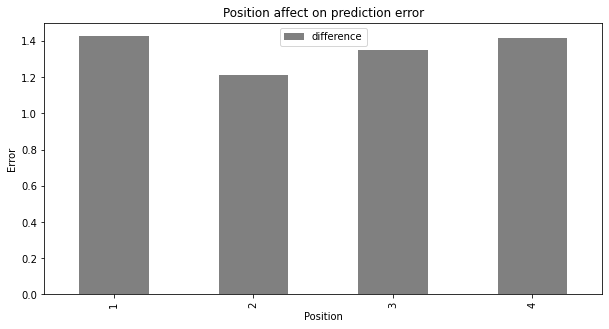

In [23]:
#Position affect on prediction error
show_df.plot(kind='bar', x='position', figsize=(10,5), color='gray')
plt.title('Position affect on prediction error')
plt.xlabel('Position')
plt.ylabel('Error')